In [1]:
#from functions_load import call_remote_file_ssh
from functions_analysis import loader, total, repeatedSynID_remover, persyn, fuse_clusters
import pandas as pd
from scipy.spatial.distance import pdist, squareform


In [2]:
csv_file_path = '/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1.csv'
evtype = 1 # synch evs
singleSynFlag = [0, 226261]
grapherFlag = True
clusteringFlag = True
clusteringAlgorithmFlag = 1
fuse_clusters_flag = False
plotFlag = True
fusedClustersFlag = fuse_clusters_flag



no repeated synIDs
edges in grapher [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
nodes in plotter [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{0: (20.63722784651282, 21.36934029778552), 1: (20.23336919796967, 21.255052103221736), 2: (20.1818661032439, 21.008106715216837), 3: (20.00878345363529, 22.1196716720758), 4: (20.40325962407028, 22.02486194177299), 5: (20.51492064427524, 21.26439391055805), 6: (19.948673975356343, 21.523674292547405), 7: (19.473462958988577, 20.97777354379552), 8: (22.64664344376997, 22.080021057323897), 9: (20.62846666378552, 22.058296891771416)}


,synID,x,y,frame,frameRelat,timeFromLast,distFromLast,cluster,cluster_o,G
0,58506,20.567313,19.360561,1305,1,NaN,NaN,NaN,NaN,NaN
1,58506,22.887715,21.356194,1665,1,18000.0,265.245641,NaN,NaN,NaN
2,58506,21.503880,22.719915,1725,1,3000.0,168.381903,NaN,NaN,NaN
3,58506,23.112124,22.351458,1885,1,8000.0,142.992401,NaN,NaN,NaN
4,58506,24.198760,24.084810,1905,1,1000.0,177.302514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
151,86793,21.602614,22.392885,785,1,NaN,NaN,NaN,NaN,NaN
152,86793,21.870189,21.707640,905,1,6000.0,63.754961,NaN,NaN,NaN
153,86793,18.313267,19.709696,1105,1,10000.0,353.569012,NaN,NaN,NaN
154,86793,20.952966,21.292932,1305,1,10000.0,266.767965,NaN,NaN,NaN


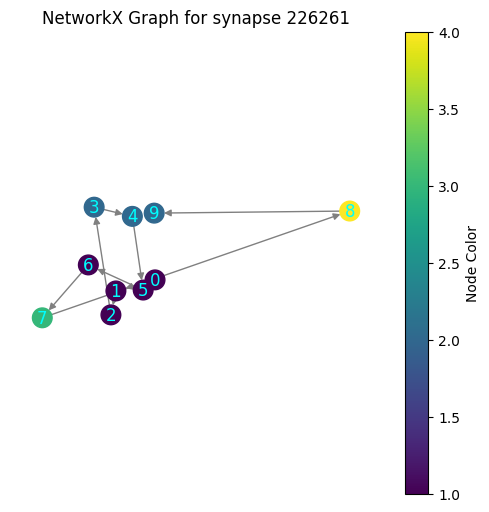

In [3]:
total(
        csv_file_path,
        evtype,
        singleSynFlag,
        clusteringFlag,
        fuse_clusters_flag,
        grapherFlag,
        fusedClustersFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )


no repeated synIDs
edges in grapher [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
nodes in plotter [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
here  10 10


,synID,x,y,frame,frameRelat,timeFromLast,distFromLast,cluster,cluster_o,G
0,58506,20.567313,19.360561,1305,1,NaN,NaN,NaN,NaN,NaN
1,58506,22.887715,21.356194,1665,1,18000.0,265.245641,NaN,NaN,NaN
2,58506,21.503880,22.719915,1725,1,3000.0,168.381903,NaN,NaN,NaN
3,58506,23.112124,22.351458,1885,1,8000.0,142.992401,NaN,NaN,NaN
4,58506,24.198760,24.084810,1905,1,1000.0,177.302514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
151,86793,21.602614,22.392885,785,1,NaN,NaN,NaN,NaN,NaN
152,86793,21.870189,21.707640,905,1,6000.0,63.754961,NaN,NaN,NaN
153,86793,18.313267,19.709696,1105,1,10000.0,353.569012,NaN,NaN,NaN
154,86793,20.952966,21.292932,1305,1,10000.0,266.767965,NaN,NaN,NaN


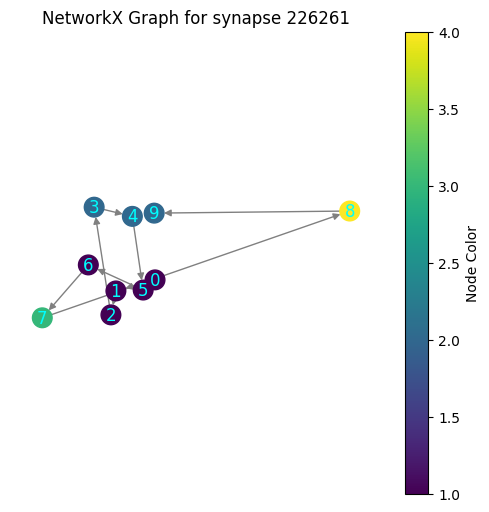

In [3]:
total(
        csv_file_path,
        evtype,
        singleSynFlag,
        clusteringFlag,
        fuse_clusters_flag,
        grapherFlag,
        fusedClustersFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )

no repeated synIDs
[0, 0, 0, 1, 1, 0, 0, 2, 3, 1]
edges in grapher [(0, 0), (0, 1), (0, 2), (1, 1), (1, 0), (2, 3), (3, 1)]
nodes in plotter [0, 1, 2, 3]
here  10 4


,synID,x,y,frame,frameRelat,timeFromLast,distFromLast,cluster,cluster_o,x_o,y_o,G
0,58506,20.567313,19.360561,1305,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58506,22.887715,21.356194,1665,1,18000.0,265.245641,NaN,NaN,NaN,NaN,NaN
2,58506,21.503880,22.719915,1725,1,3000.0,168.381903,NaN,NaN,NaN,NaN,NaN
3,58506,23.112124,22.351458,1885,1,8000.0,142.992401,NaN,NaN,NaN,NaN,NaN
4,58506,24.198760,24.084810,1905,1,1000.0,177.302514,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
151,86793,21.602614,22.392885,785,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,86793,21.870189,21.707640,905,1,6000.0,63.754961,NaN,NaN,NaN,NaN,NaN
153,86793,18.313267,19.709696,1105,1,10000.0,353.569012,NaN,NaN,NaN,NaN,NaN
154,86793,20.952966,21.292932,1305,1,10000.0,266.767965,NaN,NaN,NaN,NaN,NaN


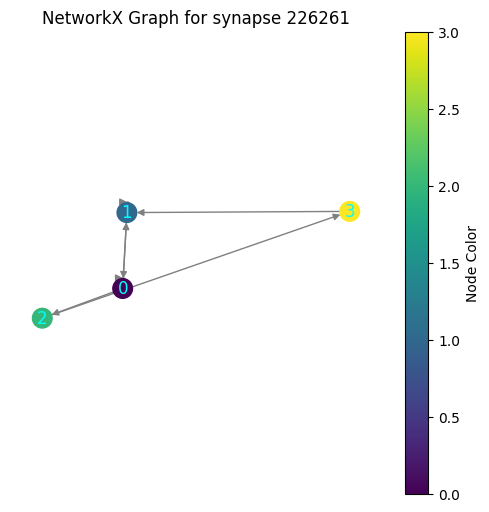

In [4]:
fuse_clusters_flag = True
fusedClustersFlag = fuse_clusters_flag
singleSynFlag = False

total(
        csv_file_path,
        evtype,
        singleSynFlag,
        clusteringFlag,
        fuse_clusters_flag,
        grapherFlag,
        fusedClustersFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )


In [ ]:
#fuse_clusters(df)

In [ ]:
df.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1_3.csv', index=True)
# df4.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/df4.csv', index=True)

In [ ]:
# print(df3)

In [ ]:
pixel_size = 86.6667
eps_nm = 50
eps = eps_nm / pixel_size   # Maximum distance between samples to be considered part of the same cluster
print(eps, 'Maximum distance between samples to be considered part of the same cluster')

mask_ID = (df['synID'] == singleSynFlag[1])
df_syn = df.loc[mask_ID]

if df_syn.iloc[-1]['synID'] == df_syn.iloc[0]['synID']:
    points = df_syn[['x', 'y']]

    # Compute pairwise distances using Euclidean distance
    distances = pdist(points.values, metric='euclidean')

    # Convert to squareform to get the condensed distance matrix
    condensed_matrix = squareform(distances)
    print(condensed_matrix)
    print

0.5769228550296711 Maximum distance between samples to be considered part of the same cluster


TypeError: 'bool' object is not subscriptable

In [ ]:
from scipy.spatial.distance import squareform
import numpy as np



# Iterate through the elements of the square distance matrix
for i in range(condensed_matrix.shape[0]):
    for j in range(i + 1, condensed_matrix.shape[1]):  # Only consider upper triangle
        if condensed_matrix[i, j] < eps:
            print(f"Value {condensed_matrix[i, j]} is smaller than {eps}")
            print(f"Row index: {i}, Column index: {j}")


Value 0.2165130868891593 is smaller than 0.5769228550296711
Row index: 0, Column index: 7
Value 0.49059208059563936 is smaller than 0.5769228550296711
Row index: 1, Column index: 4
Value 0.5744218610405413 is smaller than 0.5769228550296711
Row index: 2, Column index: 8
Value 0.41695475937870463 is smaller than 0.5769228550296711
Row index: 3, Column index: 6
Value 0.5721170302254119 is smaller than 0.5769228550296711
Row index: 4, Column index: 5
Value 0.2356669740599226 is smaller than 0.5769228550296711
Row index: 5, Column index: 6
